<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/Exoplanets/Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac


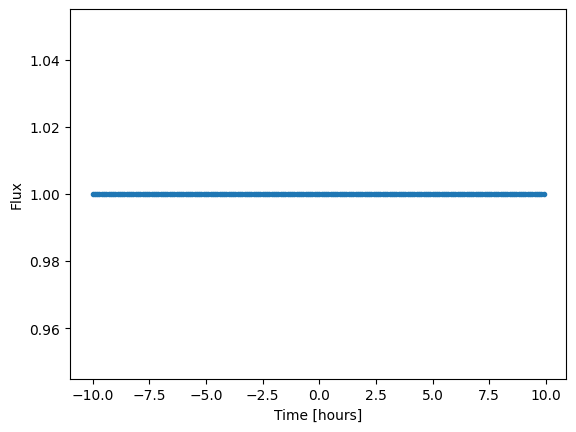

In [6]:
time_arr = np.arange(-10, 10, 0.1) * u.hour
flux_arr = np.zeros(np.shape(time_arr)) + 1.0
plt.plot(time_arr, flux_arr, linestyle="--", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [8]:
tau = 2.0 * u.hour
t_0 = 1.0 * u.hour
time_start = t_0 - tau / 2
time_end = t_0 + tau / 2
print(time_start, time_end)

0.0 h 2.0 h


In [10]:
for i in range(len(time_arr)):
    if i < 10:
      print("index =", i, "value = ", time_arr[i])

index = 0 value =  -10.0 h
index = 1 value =  -9.9 h
index = 2 value =  -9.8 h
index = 3 value =  -9.700000000000001 h
index = 4 value =  -9.600000000000001 h
index = 5 value =  -9.500000000000002 h
index = 6 value =  -9.400000000000002 h
index = 7 value =  -9.300000000000002 h
index = 8 value =  -9.200000000000003 h
index = 9 value =  -9.100000000000003 h


In [13]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
print(time_arr[ind])

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


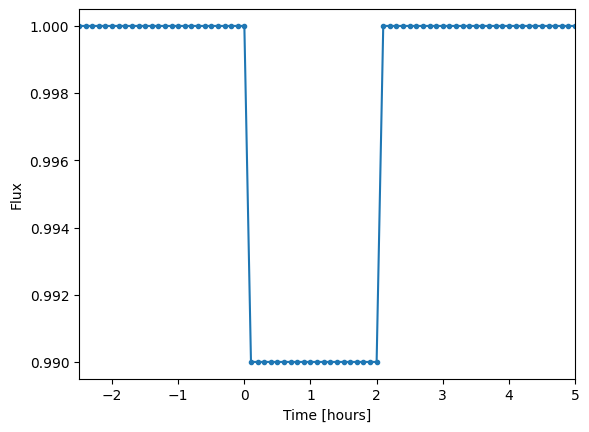

In [16]:
delta = 0.01
flux_arr[ind] = 1.0 - delta
plt.plot(time_arr, flux_arr, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5, 5.0)
plt.show()

In [17]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t_0 - tau / 2
  time_end = t_0 + tau / 2
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1.0 - delta
  return flux_arr

In [18]:
time_arr = np.arange(-10, 10, 0.1) * u.hour
tau = 4.0 * u.hour
t_0 = 2.0 * u.hour
delta = 0.99

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)

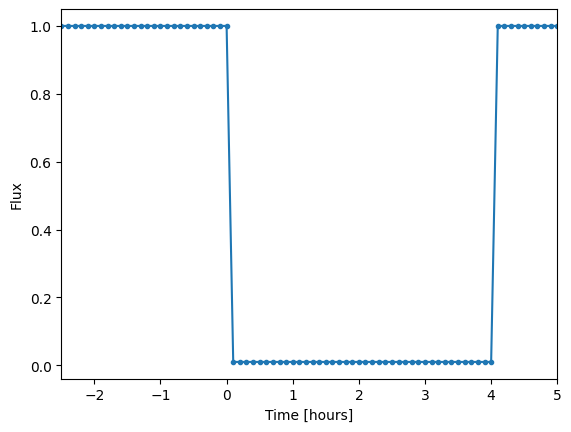

In [22]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5, 5.0)
# plt.ylim(0, 0.02)
plt.show()

In [25]:
from google.colab import files
uploaded = files.upload()


Saving gj436b.tbl to gj436b.tbl


In [26]:
import astropy.io.ascii
dat = astropy.io.ascii.read("gj436b.tbl")


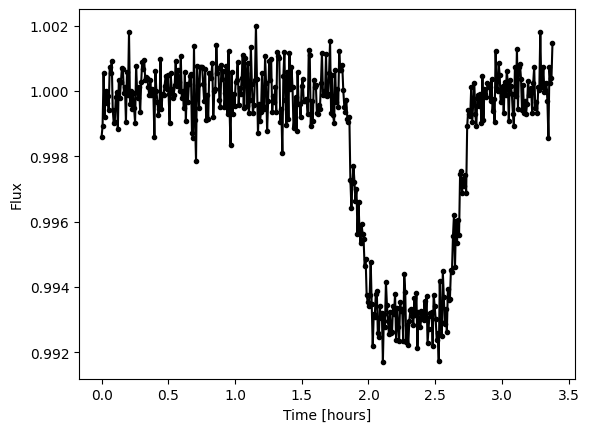

In [31]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")

plt.show()

In [32]:
t_0 = 2.2 * u.hour
tau = 1.0 * u.hour
delta = 0.008
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)

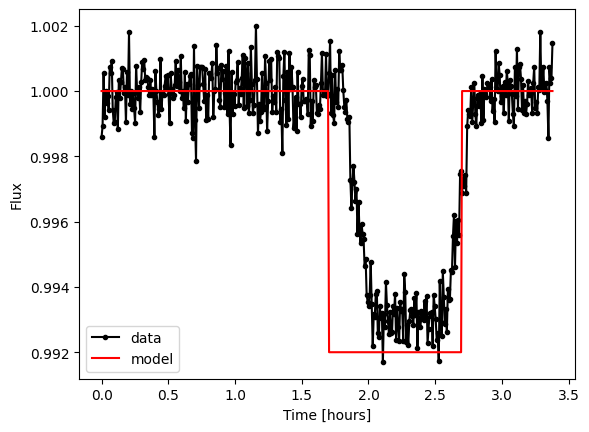

In [33]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show()